# BÁO CÁO BÀI TẬP LẬP TRÌNH 1: HIỂU DỮ LIỆU  
## Môn học: Khai phá Dữ liệu (Data Mining)

---

## 👥 Thông tin nhóm:
1. **Họ và tên:** Lường Minh Trí  
   **Mã sinh viên:** 23020440  
   **Lớp:** K68A-AI2  

2. **Họ và tên:** Ngô Quang Dũng  
   **Mã sinh viên:** 23020440  
   **Lớp:** K68A-AI2  

3. **Họ và tên:** Kiều Đức Nam  
   **Mã sinh viên:** 23020440  
   **Lớp:** K68A-AI2  

**📊 Data set lựa chọn:**  
`[Simplize_VNM_FinancialIndicator_20250315, Simplize_VNM_PriceHistory_20250315]`
## 🎯 Mục tiêu bài tập

Bài tập nhằm giúp sinh viên **hiểu và khám phá dữ liệu tài chính** thực tế của doanh nghiệp niêm yết trên sàn chứng khoán Việt Nam, thông qua:
- Phân tích thống kê mô tả.  
- Trực quan hóa dữ liệu để phát hiện xu hướng biến động.  
- Tiền xử lý và kết hợp dữ liệu từ nhiều nguồn.  
- Tính toán và phân tích tương quan giữa giá cổ phiếu và các chỉ số tài chính.  

Mục tiêu cuối cùng là hình thành kỹ năng **hiểu dữ liệu (data understanding)** và **phân tích mối quan hệ tài chính – giá cổ phiếu** trong ngữ cảnh doanh nghiệp cụ thể.

---

## 🧩 Các phần thực hiện trong bài

### **1. Quan sát để hiểu doanh nghiệp và dữ liệu**
- Thực hiện thống kê miêu tả hai bảng dữ liệu (Chỉ số tài chính & Lịch sử giá cổ phiếu):  
  - Tính **five-number summary** (min, Q1, median/Q2, Q3, max).  
  - Tính **trung bình, trung vị, độ lệch chuẩn, phương sai**.  
- Vẽ **biểu đồ biến động giá cổ phiếu** theo thời gian (sử dụng giá đóng cửa mỗi ngày).  
- Quan sát và nhận xét các đợt **tăng/giảm bất thường**, tìm hiểu **bối cảnh thị trường hoặc sự kiện công ty** có thể ảnh hưởng.

---

### **2. Tiền xử lý dữ liệu**
- Tạo một bảng dữ liệu mới bằng cách kết hợp **bảng Lịch sử giá** và **bảng Chỉ số tài chính**.  
- Các cột bao gồm:  
  - **Thời gian (Quý/Năm)**, **Giá đóng cửa trung bình**, **Thay đổi giá**, **% thay đổi**  
  - Các chỉ số tài chính quan trọng:  
    - Biên lợi nhuận gộp  
    - Biên lợi nhuận ròng  
    - P/E  
    - EPS  
    - Tăng trưởng EPS  
    - ROE  
    - Tỷ lệ Nợ phải trả/Vốn chủ sở hữu  
    - Khả năng thanh toán tổng quát  
    - Vòng quay tài sản  
    - Giá trị sổ sách  
- Mỗi hàng thể hiện dữ liệu của **một quý**, trong đó:
  - Giá cổ phiếu = **trung bình của 29 ngày quanh ngày cuối quý** (±14 ngày).  
  - Các cột thay đổi giá và % thay đổi được tính lại tương ứng.

---

### **3. Lựa chọn các yếu tố nguy cơ (Risk Factors) tiềm năng**
- Phân tích các **yếu tố nội tại** (từ chỉ số tài chính) có thể ảnh hưởng đến giá cổ phiếu.  
- Tính **độ tương quan Pearson** giữa các chỉ số tài chính và giá cổ phiếu.  
- Đưa ra **nhận xét và kết luận**:
  - Chỉ số nào có mối quan hệ mạnh nhất (thuận hoặc nghịch).  
  - Liên hệ với thực tế doanh nghiệp.

---

### **4. Kết quả & Báo cáo**
- Trình bày code, hiển thị 5 dòng đầu của bảng dữ liệu sau khi tiền xử lý.  
- Biểu đồ phải có **tên, trục, chú thích đầy đủ**.  
- Phân tích thống kê, biểu đồ và ma trận tương quan.  
- Đưa ra **nhận xét tổng hợp**:  
  - Dữ liệu phản ánh điều gì về doanh nghiệp.  
  - Các chỉ số tài chính nào ảnh hưởng nhiều nhất tới giá cổ phiếu.

---

### ⚙️ Môi trường thực hiện
- Sử dụng **Docker Container** cho môi trường Big Data & Data Mining.  
- Ngôn ngữ lập trình: **Python 3.x**  
- Thư viện: `pandas`, `numpy`, `matplotlib`, `seaborn`, `scipy`

---

📅 **Thời gian thực hiện:** 2021–2025 (dữ liệu trong 5 năm gần đây)  
📈 **Nguồn dữ liệu:** Simplize.vn (bộ dữ liệu giá cổ phiếu & chỉ số tài chính)

---

> 🧭 *Mục tiêu cuối cùng:*  
> Hiểu rõ cách dữ liệu tài chính phản ánh hoạt động kinh doanh và biến động thị trường, đồng thời rèn luyện kỹ năng phân tích dữ liệu thực tế với Python.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đường dẫn đến 2 file (sửa lại nếu cần)
price_path = "C:\\Users\\DELL\\data_mining_project\\data\\Simplize_VNM_PriceHistory_20250315.csv"
fin_path   = "C:\\Users\\DELL\\data_mining_project\\data\\Simplize_VNM_FinancialIndicator_20250315.csv"

# Đọc dữ liệu
price = pd.read_csv(price_path)
fin = pd.read_csv(fin_path)

# Xem tên cột và vài dòng đầu
print("=== PRICE HEAD ===")
print(price.head().T)
print("\n=== FIN HEAD ===")
print(fin.head().T)



=== PRICE HEAD ===
                        0           1          2          3          4
NGÀY           14/03/2025  13/03/2025  12/3/2025  11/3/2025  10/3/2025
GIÁ MỞ CỬA      62,400.00   62,300.00  62,500.00  62,300.00  63,000.00
GIÁ CAO NHẤT    62,700.00   62,900.00  62,800.00  62,500.00  63,000.00
GIÁ THẤP NHẤT   62,100.00   61,900.00  62,200.00  62,100.00  62,500.00
GIÁ ĐÓNG CỬA    62,100.00   62,000.00  62,200.00  62,400.00  62,500.00
THAY ĐỔI GIÁ       100.00     -200.00    -200.00    -100.00    -200.00
% THAY ĐỔI           0.00       -0.00      -0.00      -0.00      -0.00
KHỐI LƯỢNG        2696700     5100400    2755400    2287600    2529500

=== FIN HEAD ===
                             0                      1                    2                          3                        4
CHỈ TIÊU       Doanh thu thuần  Tăng trưởng doanh thu        Lợi nhuận gộp  Tăng trưởng lợi nhuận gộp  Lợi nhuận thuần từ HĐKD
Q4/2024  15,477,073,125,441.00                  -0.01 6,209,690,644,98

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Giả sử bạn đã tải dữ liệu vào các DataFrame có tên df_price và df_financial
# df_price = pd.read_csv('Simplize_VNM_PriceHistory_20250315.csv')
# df_financial = pd.read_csv('Simplize_VNM_FinancialIndicator_20250315.csv')
# Hiển thị tất cả các cột (không bị ẩn bởi '...')
pd.set_option('display.max_columns', None) 
# Tăng chiều rộng hiển thị để tránh xuống dòng
pd.set_option('display.width', 1000) 
# Định dạng số thập phân, bỏ ký pháp khoa học
pd.set_option('display.float_format', '{:,.2f}'.format)
# --- Thống kê cho Lịch sử giá ---
# Chuyển đổi cột ngày tháng sang định dạng datetime
price['NGÀY'] = pd.to_datetime(price['NGÀY'], format='%d/%m/%Y')

# Chọn các cột số để tính toán
price_numeric_cols = ['GIÁ MỞ CỬA', 'GIÁ CAO NHẤT', 'GIÁ THẤP NHẤT', 'GIÁ ĐÓNG CỬA', 'KHỐI LƯỢNG']
price_stats = price[price_numeric_cols].describe()
price_variance = price[price_numeric_cols].var().to_frame('Phương sai').T
price_summary = pd.concat([price_stats, price_variance])
print("--- Thống kê mô tả dữ liệu Lịch sử giá ---")
print(price_summary)

# --- Thống kê cho Chỉ số tài chính ---
# Chuyển cột 'CHỈ TIÊU' làm chỉ mục và chuyển vị (transpose) DataFrame
fin = fin.set_index('CHỈ TIÊU').T
# Chuyển đổi các cột sang dạng số
for col in fin.columns:
    fin[col] = pd.to_numeric(fin[col], errors='coerce')

financial_summary = fin.describe()
print("\n--- Thống kê mô tả dữ liệu Chỉ số tài chính ---")
print(financial_summary)

--- Thống kê mô tả dữ liệu Lịch sử giá ---
              GIÁ MỞ CỬA  GIÁ CAO NHẤT  GIÁ THẤP NHẤT  GIÁ ĐÓNG CỬA           KHỐI LƯỢNG
count           1,000.00      1,000.00       1,000.00      1,000.00             1,000.00
mean           68,190.56     68,783.36      67,603.14     68,111.67         3,131,697.22
std             5,260.29      5,284.93       5,192.61      5,246.75         1,819,471.43
min            56,214.81     57,423.73      55,696.70     55,696.70           691,300.00
25%            64,018.15     64,495.34      63,611.65     63,992.72         1,932,900.00
50%            67,571.00     68,099.15      67,037.38     67,571.00         2,702,950.00
75%            72,110.90     72,710.85      71,477.98     72,051.66         3,882,825.00
max            86,174.49     86,174.49      84,277.83     84,690.15        21,564,900.00
Phương sai 27,670,701.21 27,930,451.27  26,963,152.25 27,528,360.66 3,310,476,277,282.16

--- Thống kê mô tả dữ liệu Chỉ số tài chính ---
CHỈ TIÊU       Doa

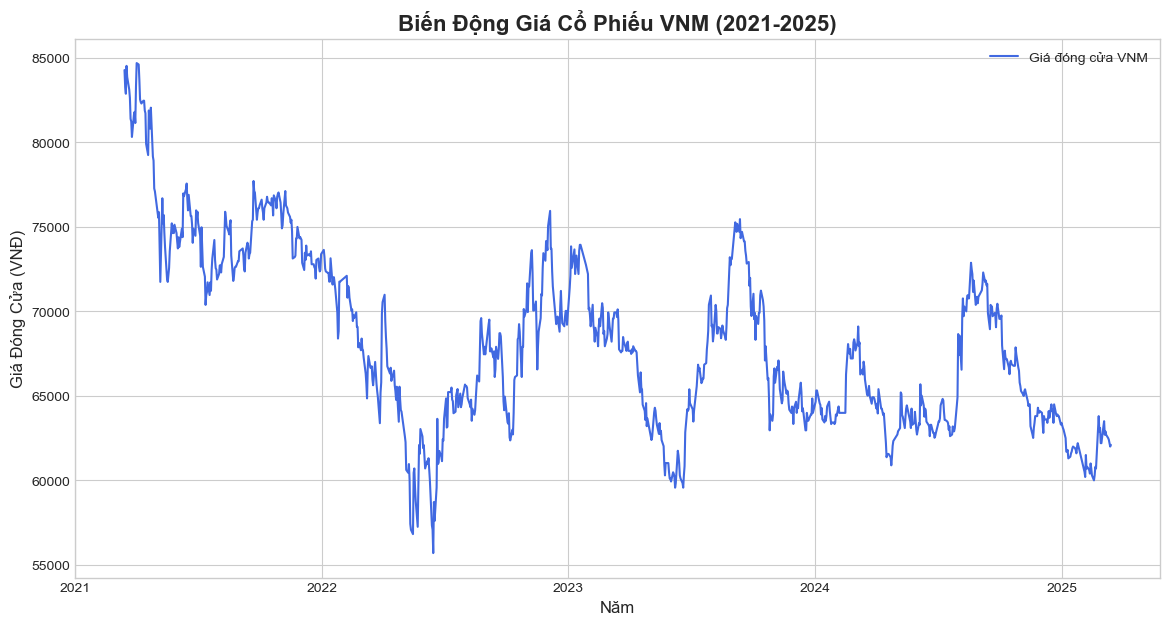

In [13]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))

# Vẽ biểu đồ giá đóng cửa
ax.plot(price['NGÀY'], price['GIÁ ĐÓNG CỬA'], label='Giá đóng cửa VNM', color='royalblue')

# Định dạng biểu đồ
ax.set_title('Biến Động Giá Cổ Phiếu VNM (2021-2025)', fontsize=16, weight='bold')
ax.set_xlabel('Năm', fontsize=12)
ax.set_ylabel('Giá Đóng Cửa (VNĐ)', fontsize=12)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.grid(True)
plt.show()